In [104]:
import pandas as pd
import numpy as np 

#Import the data into 'df' - the dataframe
df = pd.read_csv(r'C:\Users\Andrew\OneDrive - University of Connecticut\Desktop\Stat4188-Final\alzheimer.csv')
dfClassifiers = pd.read_csv(r'C:\Users\Andrew\OneDrive - University of Connecticut\Desktop\Stat4188-Final\alzheimer.csv')
df.shape

(373, 10)

In [105]:
#Data Cleaning
df.head()

#Check for missing values and types of variables
nan_vals = df.isna().sum()
print(nan_vals, df.dtypes)

sesColumn = df['SES']
print(sesColumn)


Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64 Group     object
M/F       object
Age        int64
EDUC       int64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
dtype: object
0      2.0
1      2.0
2      NaN
3      NaN
4      NaN
      ... 
368    1.0
369    1.0
370    2.0
371    2.0
372    2.0
Name: SES, Length: 373, dtype: float64


In [106]:
# Data Cleaning - Part 2
df.dropna(inplace=True)
df.shape
    

(354, 10)

Text(0, 0.5, 'Count')

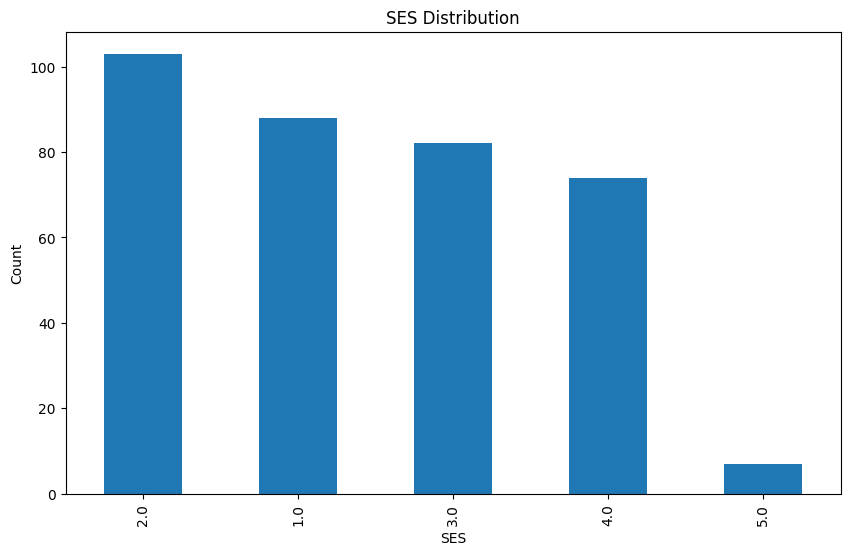

In [107]:
# Data Visualization Part 1
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm 
plt.figure(figsize=(10,6))
df['SES'].value_counts().plot(kind='bar')
plt.title('SES Distribution')
plt.xlabel('SES')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

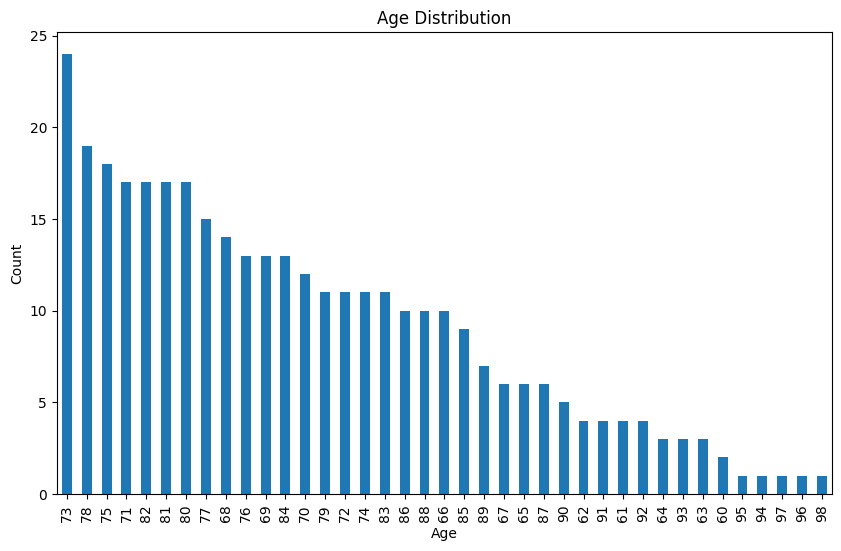

In [108]:
# Data Visualization Part 2

plt.figure(figsize=(10,6))
df['Age'].value_counts().plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

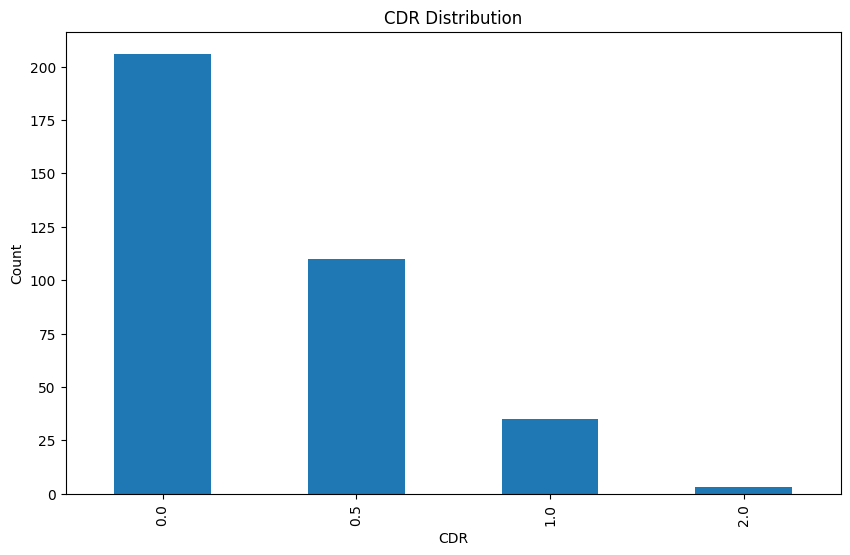

In [109]:
# Data Visualization Part 3

plt.figure(figsize=(10,6))
df['CDR'].value_counts().plot(kind='bar')
plt.title('CDR Distribution')
plt.xlabel('CDR')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

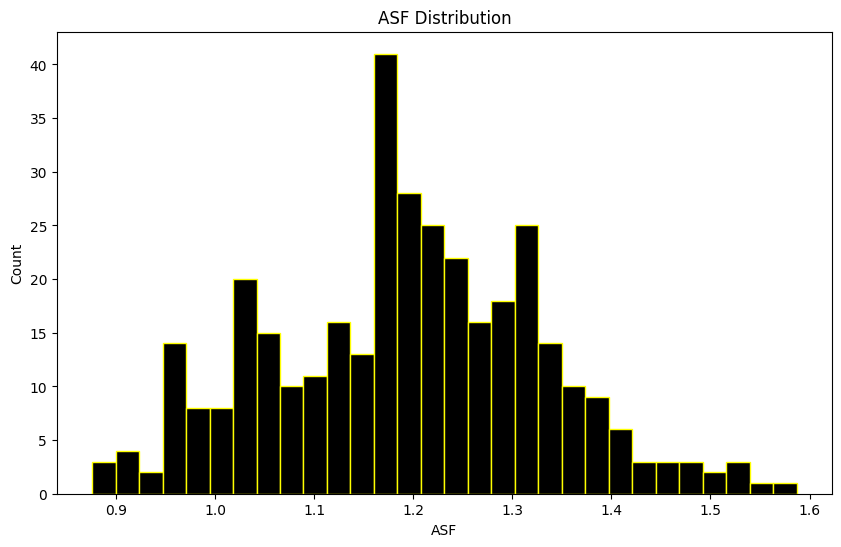

In [110]:
# Data Visualization Part 4

plt.figure(figsize=(10,6))
plt.hist(df['ASF'], bins=30, color='black', edgecolor='yellow')
plt.title('ASF Distribution')
plt.xlabel('ASF')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

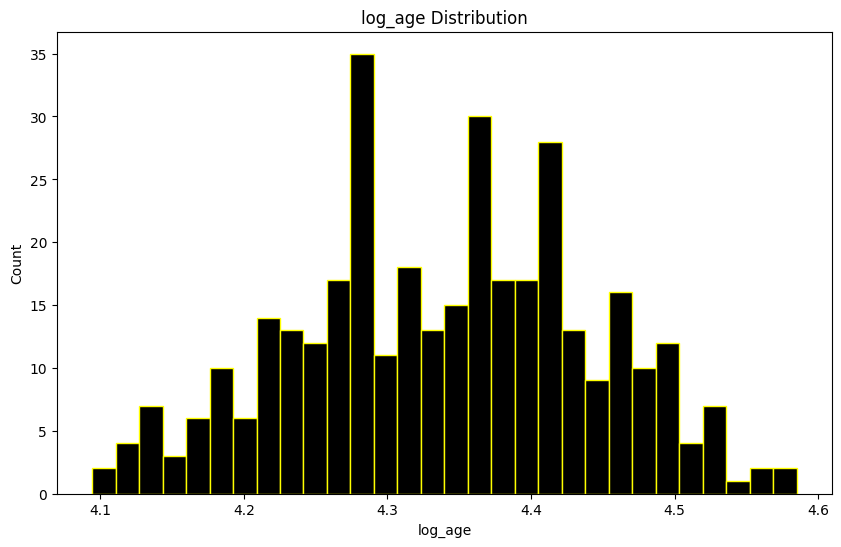

In [111]:
# Data Transformation
df['log_age'] = np.log(df['Age'])
plt.figure(figsize=(10,6))
plt.hist(df['log_age'], bins=30, color='black', edgecolor='yellow')
plt.title('log_age Distribution')
plt.xlabel('log_age')
plt.ylabel('Count')


In [112]:
# Data Transformation 2
# transforming gender
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
encoder = OneHotEncoder()
print(df.isna().sum())
#df.drop(['Group_Converted', 'Group_Demented', 'Group_Nondemented', 'M/F_F', 'M/F_M'], axis=1, inplace=True)
categorical = df.select_dtypes(include=['object']).columns.tolist()
# Select the categorical columns
# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to the categorical columns
df['M/F'] = le.fit_transform(df['M/F'])
df['Group'] = le.fit_transform(df['Group'])
print(df.dtypes)
#dfFinal = pd.concat([df, dfEncoded], axis=1)

Group      0
M/F        0
Age        0
EDUC       0
SES        0
MMSE       0
CDR        0
eTIV       0
nWBV       0
ASF        0
log_age    0
dtype: int64
Group        int32
M/F          int32
Age          int64
EDUC         int64
SES        float64
MMSE       float64
CDR        float64
eTIV         int64
nWBV       float64
ASF        float64
log_age    float64
dtype: object


In [113]:
# Data Modeling 1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


In [114]:
# Linear Regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
df1 = df.copy()
y=df1['CDR']
X=df1.drop(['CDR', 'Group'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lrModel = LinearRegression()
lrModel.fit(X_train, y_train)
ypred = lrModel.predict(X_test)
mse = mean_squared_error(y_test, lrModel.predict(X_test))
r2 = r2_score(y_test, ypred)
mae = mean_absolute_error(y_test, ypred)
print(mse, r2, mae)

0.04395935700773215 0.6067451310098 0.1718803203208284


In [115]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# dfClassifiers
df3 = df.copy()


y2=df3['CDR']
X2=df3.drop(['CDR', 'M/F', 'Group'], axis=1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y2, test_size=0.2, random_state=0)

clf=DecisionTreeRegressor()

clf=clf.fit(X_train1, y_train1)
y_pred2=clf.predict(X_test1)

mse2= mean_squared_error(y_test1, y_pred2)
r2_2= r2_score(y_test1, y_pred2)
mae2 = mean_absolute_error(y_test1, y_pred2)
print(mse2, r2_2, mae2)


0.06690140845070422 0.4015084294587402 0.13380281690140844


In [116]:
# Random Forest
df4 = df.copy()


y3=df4['CDR']
x3=df4.drop(['CDR', 'M/F', 'Group'], axis=1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(x3, y3, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf = rf.fit(X_train2, y_train2)

y_pred3 = rf.predict(X_test2)
mse3 = mean_squared_error(y_test2, y_pred3)
r2_3 = r2_score(y_test2, y_pred3)
mae3 = mean_absolute_error(y_test2, y_pred3)
print(mse3, r2_3, mae3)

0.04134718309859155 0.6301133096716949 0.1532394366197183


In [117]:
# Gradient Boosted

df5 = df.copy()

y4=df5['CDR']
X4=df5.drop(['CDR', 'M/F', 'Group'], axis=1)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X4, y4, test_size=0.2, random_state=0)

from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, random_state=0)
gb = gb.fit(X_train3, y_train3)

y_pred4=gb.predict(X_test3)

mse4= mean_squared_error(y_test3, y_pred4)
r2_4= r2_score(y_test3, y_pred4)
mae4=mean_absolute_error(y_test3, y_pred4)

print(mse4, r2_4, mae4)


0.045135865763303605 0.5962202319204731 0.16846508519699957


In [120]:
# Hyperparameter Tuning -> Random Forest

from sklearn.model_selection import GridSearchCV

df6 = df.copy()
y5 = df6['CDR']
X5=df6.drop(['CDR', 'M/F', 'Group'], axis=1)

X_train4, X_test4, y_train4, y_test4 = train_test_split(X5, y5, test_size=0.2, random_state=0)

rf1=RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf1, param_grid=param_grid,cv=3)
grid_search.fit(X_train4, y_train4)
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("Best estimator: ", grid_search.best_estimator_)

Best parameters:  {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best score:  0.4815538847300897
Best estimator:  RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200)


In [145]:
# Hyperparameter Tuning -> Gradient Boosted
df10 = df.copy()
y10 = df10['CDR']
X10=df10.drop(['CDR', 'M/F', 'Group', 'Age'], axis=1)

X_train10, X_test10, y_train10, y_test10 = train_test_split(X10, y10, test_size=0.2, random_state=0)

gb2=GradientBoostingRegressor()
param_grid2 = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}
grid_search2 = GridSearchCV(estimator=gb2, param_grid=param_grid2,cv=5)
grid_search2.fit(X_train10, y_train10)
print("Best parameters: ", grid_search2.best_params_)
print("Best score: ", grid_search2.best_score_)
print("Best estimator: ", grid_search2.best_estimator_)


Best parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Best score:  0.4708494283161165
Best estimator:  GradientBoostingRegressor(max_depth=5, n_estimators=50)


In [166]:
# Gradient Boost -> Hyperparameter Tuning
## Why R2 less than original :(
df11 = df.copy()
y11 = df11['CDR']
X11=df11.drop(['CDR', 'M/F', 'Group', 'Age'], axis=1)

X_train11, X_test11, y_train11, y_test11 = train_test_split(X11, y11, test_size=0.2, random_state=0)
gb3=GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=5)
gb3 = gb3.fit(X_train11, y_train11)
y_pred11=gb3.predict(X_test11)
mse11= mean_squared_error(y_test11, y_pred11)
r2_11= r2_score(y_test11, y_pred11)
mae11=mean_absolute_error(y_test11, y_pred11)
print(mse11, r2_11, mae11)

#

0.04997903921200802 0.5528938124796232 0.168000800132967


In [127]:
# Random Forest -> Hyper
# RF was our best model, so i hyperparameter tuned it
df7 = df.copy()
y6 = df7['CDR']
X6=df7.drop(['CDR', 'M/F', 'Group'], axis=1)

X_train5, X_test5, y_train5, y_test5 = train_test_split(X6, y6, test_size=0.2, random_state=0)

rf2 = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=10, min_samples_leaf=4) # Best parameters from above
rf2 = rf2.fit(X_train5, y_train5)
ypred5 = rf2.predict(X_test5)

mse5= mean_squared_error(y_test5, ypred5)
r2_5= r2_score(y_test5, ypred5)
mae5=mean_absolute_error(y_test5, ypred5)
print(mse5, r2_5, mae5)

0.04585081910948976 0.5898243493683446 0.16570937013833212


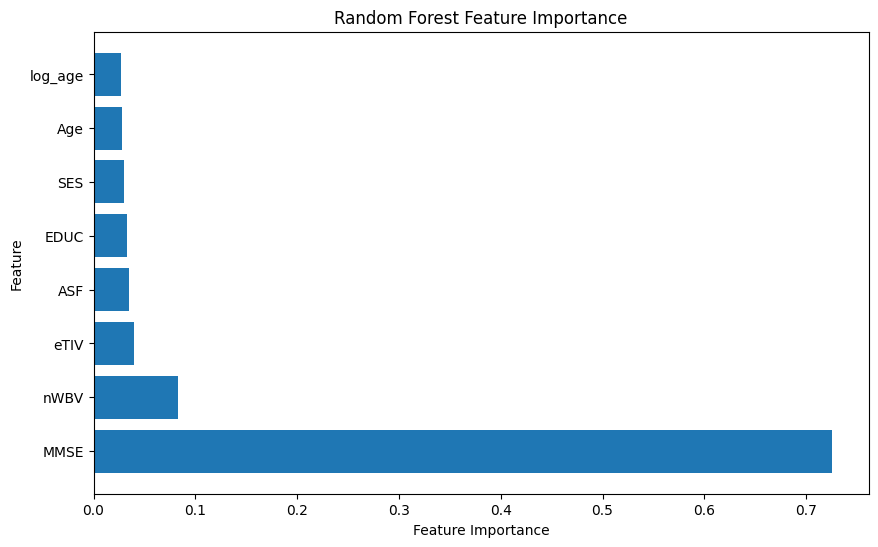

In [128]:
# Feature Importance
## Seeing how important each feature is to the model
feauture_importance = rf2.feature_importances_
feature_names = X6.columns
fiDF = pd.DataFrame({'Feature': feature_names, 'Importance': feauture_importance})
fiDF = fiDF.sort_values(by='Importance', ascending=False)



plt.figure(figsize=(10, 6))
plt.barh(fiDF['Feature'], fiDF['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

0.04610445465179813 0.5875553577644821 0.1663884301800408


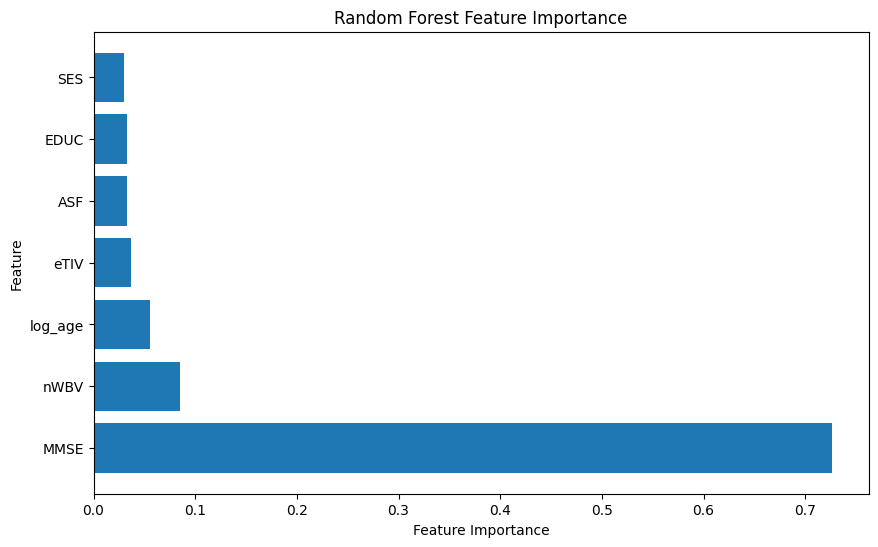

In [143]:
# RF without Age
df8 = df.copy()

y7 = df8['CDR']
X7=df8.drop(['CDR', 'M/F', 'Group', 'Age'], axis=1)

X_train6, X_test6, y_train6, y_test6 = train_test_split(X7, y7, test_size=0.2, random_state=0)

rf3 = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=10, min_samples_leaf=4) # Best parameters from above
rf3 = rf3.fit(X_train6, y_train6)
ypred6 = rf3.predict(X_test6)

mse6= mean_squared_error(y_test6, ypred6)
r2_6= r2_score(y_test6, ypred6)
mae6=mean_absolute_error(y_test6, ypred6)
print(mse6, r2_6, mae6)

feauture_importance = rf3.feature_importances_
feature_names = X7.columns
fiDF2 = pd.DataFrame({'Feature': feature_names, 'Importance': feauture_importance})
fiDF2 = fiDF2.sort_values(by='Importance', ascending=False)



plt.figure(figsize=(10, 6))
plt.barh(fiDF2['Feature'], fiDF2['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

Data Cleaning: 
    -Used Pandas library to read csv into a dataframe and check the shape of my data
    -Used Numpy library to check types of variables (integers, objects, etc..)
    -Used Pandas to check for missing values, found some
    -Removed empty values

Data Visualization:
    -Checked features I had interest in: SES, Age, CDR, ASF. 
    -Ensured age was distributed normally by performing a log_transformation

Data Modeling:
    -